In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
a=pd.DataFrame({'x':[1,2,3],'y':[2,2,2]})

In [3]:
file_name='DSI_kickstarterscrape_dataset.csv'
data = pd.read_csv(file_name, encoding= 'unicode_escape')
data.columns = data.columns.str.replace(' ','_')
data.funded_date=pd.to_datetime(data.funded_date)
data.head()

,project_id,name,url,category,subcategory,location,status,goal,pledged,funded_percentage,backers,funded_date,levels,reward_levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,2011-08-19 19:28:17+00:00,7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,2010-08-02 03:59:00+00:00,5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,2012-06-08 00:00:31+00:00,10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,2012-04-08 02:14:00+00:00,13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,2011-06-01 15:25:39+00:00,6,"$10,$25,$50,$100,$150,$250",2,0,30.00


### What is the mean (total) pledge that projects get? (not per backer)
Your answer may vary by +/- 5%

In [4]:
data.pledged.mean()

4980.749678963979

### Create a histogram that shows the distribution for number of backers. What is the skew of the distribution?

<AxesSubplot:xlabel='backers', ylabel='Density'>

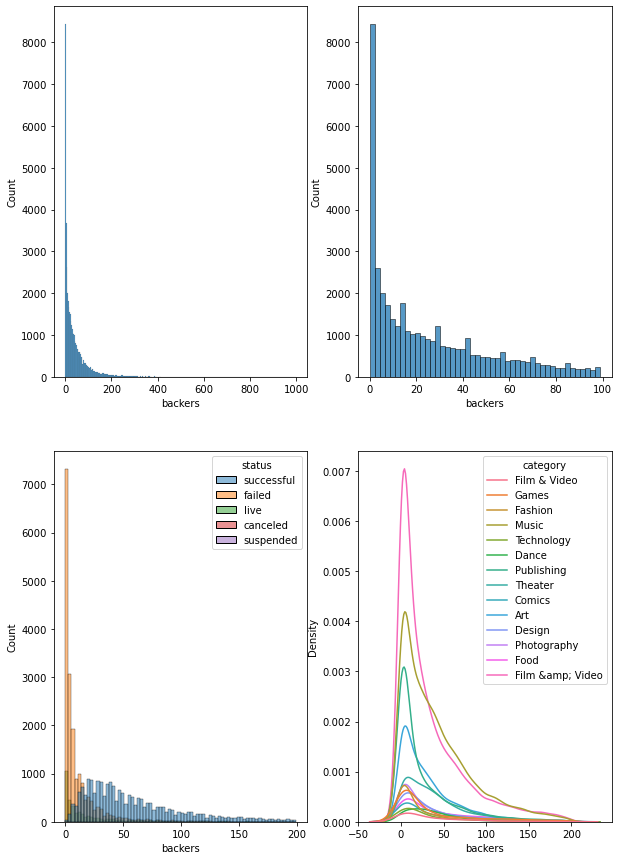

In [5]:
fig, axes = plt.subplots(2, 2,  figsize=(10,15))

plt.subplot(2,2,1)
sns.histplot(data.backers[(data.backers<1000)])
plt.subplot(2,2,2)
sns.histplot(data.backers[(data.backers<100)])
plt.subplot(2,2,3)
sns.histplot(data=data[(data.backers<200)],x=data.backers,hue='status')
plt.subplot(2,2,4)
sns.kdeplot(data=data[(data.backers<200)],x=data.backers,hue='category')


### Is the ‘duration’ variable normally distributed?

<AxesSubplot:xlabel='duration', ylabel='Count'>

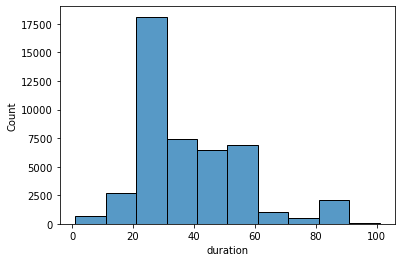

In [6]:
sns.histplot(data.duration,binwidth= 10)

<AxesSubplot:xlabel='duration', ylabel='Density'>

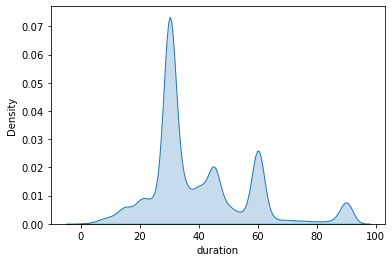

In [7]:
sns.kdeplot(data.duration,shade=True)

<AxesSubplot:xlabel='duration', ylabel='Count'>

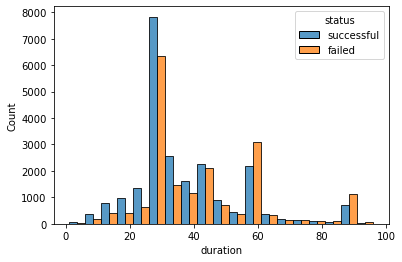

In [8]:
sns.histplot(x=data.duration,binwidth=5, hue = data.status[data.status.isin(['successful','failed'])],multiple="dodge")

<AxesSubplot:xlabel='duration', ylabel='Count'>

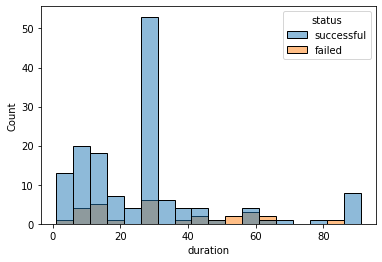

In [9]:
sns.histplot(x=data.duration[data.goal<100],binwidth=5, hue = data.status[data.status.isin(['successful','failed'])])

In [10]:
a=data[(data.goal<10)&(data.status =='successful')].size/data[(data.status =='successful')].size
b=data[(data.status =='successful')].size/data[(data.status =='failed')].size
print('the ratio of successful for goal below 10$ and is all successful is ',a)
print('the ratio between successful and failed is ',b)

the ratio of successful for goal below 10$ and is all successful is  0.0015673298794026732
the ratio between successful and failed is  1.2091492945883344


### If you could collect data on another attribute of these projects, what would it be and why?

- attention, the number of viewer, click to the page.
- Maximun pledged of that project


## part 2
make clear recommendations on how people can create a successful Kickstarter campaign.

   - What's the best length of time to run a campaign?
   - What's the ideal pledge goal?
   - What type of projects would be most successful at getting funded?
   - Is there an ideal month/day/time to launch a campaign?

#### length of time to run a campaign

C:\Users\latte\anaconda3\envs\myspace\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\latte\anaconda3\envs\myspace\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


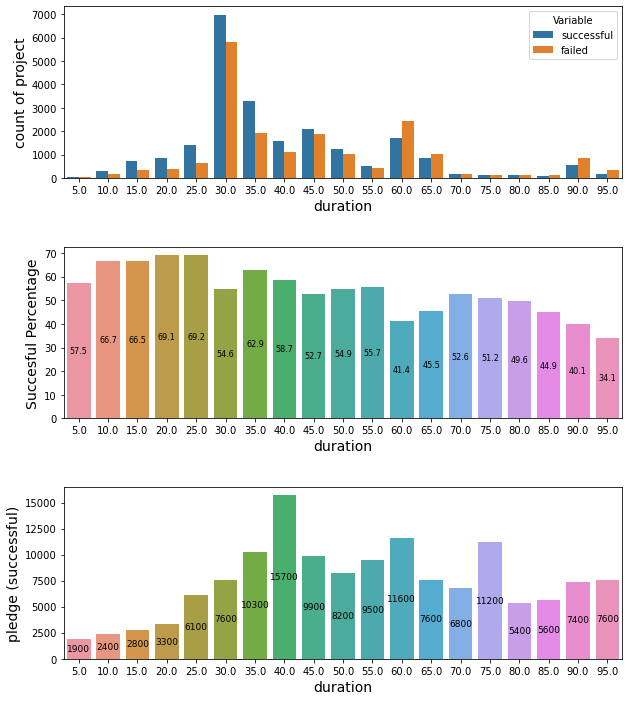

In [11]:
fig, axes = plt.subplots(3, 1,  figsize=(10,12));
plt.subplots_adjust(hspace=0.4)

BW=5
# plt.subplot(4,1,1)
# a=sns.histplot(x=data.duration,binwidth=BW, hue = data.status[data.status.isin(['successful','failed'])]);
# a.bar_label(a.containers[1],size=8,label_type='edge');

plt.subplot(3,1,1)

suc= np.array([data.status[(data.duration>i*BW)& (data.duration <=(i+1)*BW) & (data.status == 'successful')].size for i in range(19)])
fail=np.array([data.status[(data.duration>i*BW)& (data.duration <=(i+1)*BW) & (data.status == 'failed')].size for i in range(19)])
sf=pd.DataFrame({'successful':suc,'failed':fail,'duration':np.arange(BW,data.duration.max()+BW,BW)})

tidy = sf.melt(id_vars='duration').rename(columns=str.title)
sns.barplot(x='Duration', y='Value', hue='Variable', data=tidy )
plt.xlabel("duration", size=14);
plt.ylabel("count of project", size=14);

plt.subplot(3,1,2)
perS=100*suc/(suc+fail);
perS=np.round(perS,1);
b=sns.barplot(np.arange(BW,data.duration.max()+BW,BW),perS);
b.bar_label(b.containers[0],size=8,label_type='center');
plt.xlabel("duration", size=14);
plt.ylabel("Succesful Percentage", size=14);

plt.subplot(3,1,3)
pledge=[data.pledged[(data.duration>i*BW)& (data.duration <=(i+1)*BW) & (data.status == 'successful')].mean() for i in range(19)]
pledge=np.round(pledge,-2)
b=sns.barplot(np.arange(BW,data.duration.max()+BW,BW),pledge);
b.bar_label(b.containers[0],size=9,label_type='center');
plt.xlabel("duration", size=14);
plt.ylabel("pledge (successful)", size=14);

# Val=pledge*(perS-50)/15000
# Val=np.round(Val,1)
# Val = [ x if x>0 else 0 for x in Val]
# plt.subplot(4,1,4)
# c=sns.barplot(np.arange(BW,data.duration.max()+BW,BW),Val)
# c=c.bar_label(c.containers[0],size=9,label_type='center');
# plt.xlabel("duration", size=14);
# plt.ylabel("x-value", size=14);


#####  about duration
I suggest 20 to 25 days or 30 to 40 days

#### What's the ideal pledge goal

<AxesSubplot:xlabel='goal', ylabel='Count'>

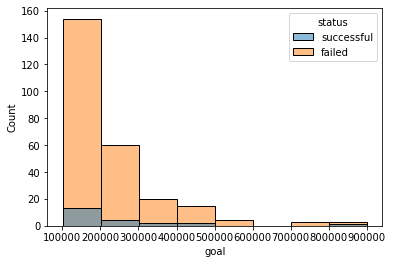

In [12]:
sns.histplot(x=data.goal[(data.goal<=900000)& (data.goal>100000)],binwidth=100000, hue =data.status[data.status.isin(['successful','failed'])])

C:\Users\latte\anaconda3\envs\myspace\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\latte\anaconda3\envs\myspace\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\latte\anaconda3\envs\myspace\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


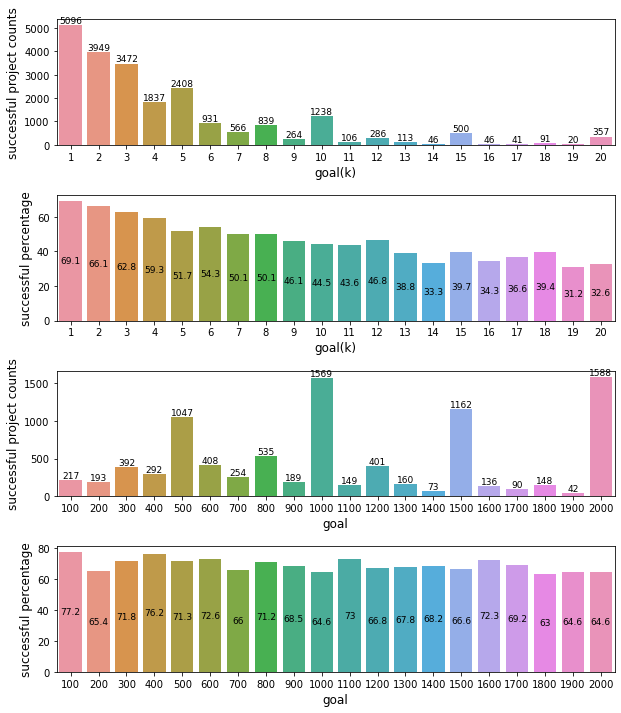

In [13]:
BW=1000
suc= np.array([data.status[(data.goal>i*BW)& (data.goal <=(i+1)*BW) & (data.status == 'successful')].size for i in range(20)])
fail= np.array([data.status[(data.goal>i*BW)& (data.goal <=(i+1)*BW) & (data.status == 'failed')].size for i in range(20)])
srate=np.round(100*suc/(fail+suc),1)

fig, axes = plt.subplots(4, 1,  figsize=(10,12));

plt.subplots_adjust(hspace=0.4)

plt.subplot(4,1,1)
b=sns.barplot(np.arange(1,21,1),suc)
plt.xlabel("goal(k)", size=12);
plt.ylabel("successful project counts", size=12);
b.bar_label(b.containers[0],size=9,label_type='edge');

plt.subplot(4,1,2)
b=sns.barplot(np.arange(1,21,1),srate)
plt.xlabel("goal(k)", size=12);
plt.ylabel("successful percentage", size=12);
b.bar_label(b.containers[0],size=9,label_type='center');

BW=100
suc= np.array([data.status[(data.goal>i*BW)& (data.goal <=(i+1)*BW) & (data.status == 'successful')].size for i in range(20)])
fail= np.array([data.status[(data.goal>i*BW)& (data.goal <=(i+1)*BW) & (data.status == 'failed')].size for i in range(20)])
srate=np.round(100*suc/(fail+suc),1)

plt.subplot(4,1,3)
b=sns.barplot(np.arange(100,2100,100),suc)
plt.xlabel("goal", size=12);
plt.ylabel("successful project counts", size=12);
b.bar_label(b.containers[0],size=9,label_type='edge');

plt.subplot(4,1,4)
b=sns.barplot(np.arange(100,2100,100),srate)
plt.xlabel("goal", size=12);
plt.ylabel("successful percentage", size=12);
b.bar_label(b.containers[0],size=9,label_type='center');

In [14]:
s=data.status[(data.goal>20000) & (data.status == 'successful')].size
f=data.status[(data.goal>20000) & (data.status == 'failed')].size
print('goal more than 20,000 $')
print('successful :',s,' projects')
print('failed :',f,'projects')
print('successful percentage :',np.round(100*s/f,1),'%')

goal more than 20,000 $
successful : 763  projects
failed : 2523 projects
successful percentage : 30.2 %


#### What type of projects would be most successful at getting funded?

In [15]:
cat=data.category.unique()
suc={}
fail={}
pledged={}
backers={}
for i in cat:
    suc[i]=data.category[(data.category== i) & (data.status=='successful')].size
    fail[i]=data.category[(data.category== i) & (data.status=='failed')].size
    pledged[i]=data.pledged[(data.category== i)& (data.status=='successful')].mean()
    backers[i]=data.backers[(data.category== i)& (data.status=='successful')].mean()

a=np.array(list(suc.values()))
b=np.array(list(fail.values()))
c=np.round(100*a/(a+b))
d=np.round(np.array(list(pledged.values())),-2)
e=np.round(np.array(list(backers.values())))

cat=pd.DataFrame({'successful':a,'failed':b,'successful_percentage':c,'pledged':d,'backers':e}, index=suc.keys())
cat

,successful,failed,successful_percentage,pledged,backers
Film & Video,246,210,54.0,8900.0,104.0
Games,635,832,43.0,35800.0,758.0
Fashion,335,684,33.0,6900.0,93.0
Music,6792,3261,68.0,5400.0,79.0
Art,2106,1585,57.0,4500.0,68.0
Technology,289,448,39.0,31100.0,351.0
Dance,527,180,75.0,3400.0,50.0
Publishing,1671,2484,40.0,5600.0,96.0
Theater,1642,680,71.0,4100.0,57.0
Comics,520,448,54.0,9200.0,171.0


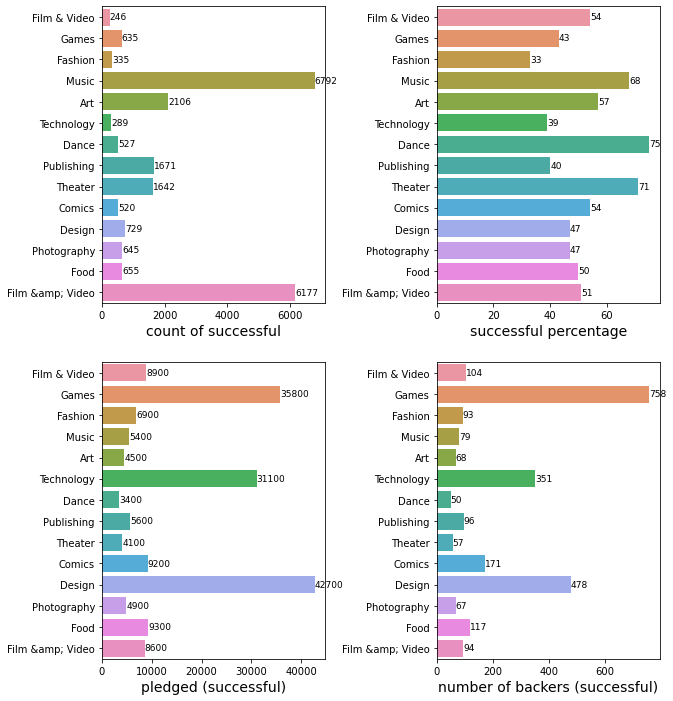

In [16]:
fig, axes = plt.subplots(2, 2,  figsize=(10,12));
plt.subplots_adjust(wspace=0.5)

plt.subplot(2,2,1)
b=sns.barplot(data=cat,x=cat.successful,y=cat.index)
b.bar_label(b.containers[0],size=9,label_type='edge');
plt.xlabel("count of successful", size=14);
plt.subplot(2,2,2)
b=sns.barplot(data=cat,x=cat.successful_percentage,y=cat.index)
b.bar_label(b.containers[0],size=9,label_type='edge');
plt.xlabel("successful percentage", size=14);

plt.subplot(2,2,3)
b=sns.barplot(data=cat,x=cat.pledged,y=cat.index)
b.bar_label(b.containers[0],size=9,label_type='edge');
plt.xlabel("pledged (successful)", size=14);

plt.subplot(2,2,4)
b=sns.barplot(data=cat,x=cat.backers,y=cat.index)
b.bar_label(b.containers[0],size=9,label_type='edge');
plt.xlabel("number of backers (successful)", size=14);

In [17]:
for c in data.category.unique():
    for s in data.subcategory[data.category == c].unique():
        n=data.subcategory[data.subcategory==s].size
        print(c+' // '+s ,n)

Film & Video // Short Film 3942
Film & Video // Animation 426
Film & Video // Documentary 4012
Film & Video // Film &amp; Video 2495
Film & Video // Webseries 1122
Film & Video // Narrative Film 1554
Games // Board & Card Games 111
Games // Games 274
Games // Video Games 911
Games // Board &amp; Card Games 442
Fashion // Fashion 1136
Music // Music 3243
Music // Indie Rock 1939
Music // Country & Folk 250
Music // Rock 1791
Music // Jazz 447
Music // Classical Music 482
Music // Pop 746
Music // Electronic Music 302
Music // World Music 428
Music // Hip-Hop 477
Music // Country &amp; Folk 808
Art // Illustration 206
Art // Performance Art 506
Art // Painting 518
Art // Conceptual Art 178
Art // Art 1076
Art // Sculpture 356
Art // Public Art 564
Art // Mixed Media 444
Art // Digital Art 144
Technology // Open Software 254
Technology // Technology 372
Technology // Open Hardware 185
Dance // Dance 761
Publishing // Fiction 1099
Publishing // Nonfiction 1062
Publishing // Art Book 339
Pu

#### Is there an ideal month/day/time to launch a campaign?

In [18]:
monthS=data[data.status=='successful'].funded_date.dt.month.value_counts().sort_index()
monthF=data[data.status=='failed'].funded_date.dt.month.value_counts().sort_index()
month_rate=monthS/(monthF+monthS)
dayS=data[data.status=='successful'].funded_date.dt.day.value_counts().sort_index()
dayF=data[data.status=='failed'].funded_date.dt.day.value_counts().sort_index()
day_rate=dayS/(dayF+dayS)

data.funded_date.dt.time

0        19:28:17
1        03:59:00
2        00:00:31
3        02:14:00
4        15:25:39
           ...   
45952    13:57:00
45953    02:12:10
45954    05:00:00
45955    19:44:47
45956    04:30:00
Name: funded_date, Length: 45957, dtype: object

In [19]:
a=data[data.status=='successful'].funded_date.value_counts().resample('H').sum()
b=data[data.status=='failed'].funded_date.value_counts().resample('H').sum()

In [20]:
h=np.zeros(24)
for i in range(24):
    h[i]=a[a.index.hour==i].sum()/(b[b.index.hour==i].sum()+a[a.index.hour==i].sum())

(0.0, 1.0)

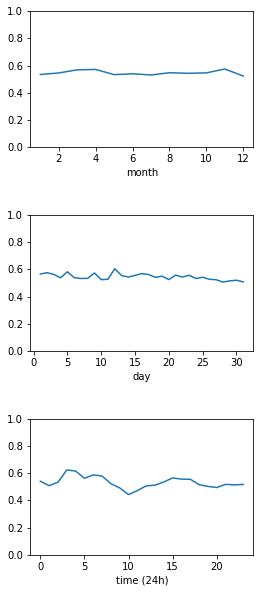

In [21]:
fig, axes = plt.subplots(3,1 , figsize=(4,10));
plt.subplots_adjust(hspace=0.5)


plt.subplot(3,1,1)
plt.plot(month_rate)
plt.xlabel('month')
plt.ylim(0,1)
plt.subplot(3,1,2)
plt.plot(day_rate)
plt.xlabel('day')
plt.ylim(0,1)
plt.subplot(3,1,3)
plt.plot(h)
plt.xlabel('time (24h)')
plt.ylim(0,1)